<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [142]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

estados_bruto = BeautifulSoup (open('./estados-bruto.xml', mode='r'), 'lxml' )

<ipython-input-142-cf66a4882fb4>:7: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  estados_bruto = BeautifulSoup (open('./estados-bruto.xml', mode='r'), 'lxml' )


In [ ]:
# visualize os resultados

estados_bruto

In [144]:
# manipule os dados
# continue o codigo aqui
estados = []
for linha in estados_bruto.find_all('estado'):
    id = linha.find('id').get_text()
    nome = linha.find('nome').get_text()
    sigla = linha.find('sigla').get_text()
    regiao = linha.find('regiao').get_text()
    estados.append([nome, sigla, regiao])

print(estados)




[['ACRE', 'AC', 'NORTE'], ['ALAGOAS', 'AL', 'NORDESTE'], ['AMAPA', 'AP', 'NORTE'], ['AMAZONAS', 'AM', 'NORTE'], ['BAHIA', 'BA', 'NORDESTE'], ['CEARA', 'CE', 'NORDESTE'], ['DISTRITO FEDERAL', 'DF', 'CENTRO-OESTE'], ['ESPIRITO SANTO', 'ES', 'SUDESTE'], ['GOIAS', 'GO', 'CENTRO-OESTE'], ['MARANHAO', 'MA', 'NORDESTE'], ['MATO GROSSO', 'MT', 'CENTRO-OESTE'], ['MATO GROSSO DO SUL', 'MS', 'CENTRO-OESTE'], ['PARA', 'PA', 'NORTE'], ['PARAIBA', 'PB', 'NORDESTE'], ['PARANA', 'PR', 'SUL'], ['PERNAMBUCO', 'PE', 'NORDESTE'], ['PIAUI', 'PI', 'NORDESTE'], ['RIO DE JANEIRO', 'RJ', 'SUDESTE'], ['RIO GRANDE DO NORTE', 'RN', 'NORDESTE'], ['RIO GRANDE DO SUL', 'RS', 'SUL'], ['RONDONIA', 'RO', 'NORTE'], ['RORAIMA', 'RR', 'NORTE'], ['SANTA CATARINA', 'SC', 'SUL'], ['SAO PAULO', 'SP', 'SUDESTE'], ['SERGIPE', 'SE', 'NORDESTE'], ['TOCANTINS', 'TO', 'NORTE'], ['MINAS GERAIS', 'MG', 'SUDESTE']]


In [145]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;
import csv
NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

# continue o codigo aqui


header = ['estado', 'sigla', 'regiao']

estados_cabecalho = [header] + estados
with open(file = './estados-limpo.csv', mode = 'w', encoding = 'utf8') as arquivo:
    escritor_csv = csv.writer(arquivo, delimiter = ';')
    escritor_csv.writerows(estados_cabecalho)

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [146]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

cidades_bruto = pd.read_csv(NOME_ARQUIVO_FONTE, sep = ',')

In [ ]:
# visualize os resultados

# continue o codigo aqui
cidades_bruto

In [148]:
# manipule os dados
# continue o codigo aqui

cidades_limpo = cidades_bruto[cidades_bruto ['Censo'] == 2010][['UF', 'nome','PIB','Pop_est_2009','PIB_percapita']]
cidades_limpo

,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,PIAUÍ,Nazária,2.095138e+04,7895,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,1.876289e+05,9737,19269.679688
5562,PARANÁ,Planalto,1.385535e+05,13983,9908.709961
5563,SÃO PAULO,Guararapes,5.320191e+05,29639,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,2.198064e+04,3067,7166.819824


In [155]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'


# continue o codigo aqui

with open(file = './cidades-limpo.csv', mode = 'w', encoding = 'utf8') as arquivo:
    escritor_csv = csv.writer(arquivo, delimiter = ';')
    cidades_limpo.to_csv('cidades-limpo.csv', index = False)


### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [156]:
# solução do exercício 1.3

estados_df = pd.read_csv('estados-limpo.csv', sep = ';')
cidades_df = pd.read_csv('cidades-limpo.csv', sep = ',')

,estado,sigla,regiao,nome,PIB,Pop_est_2009,PIB_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,1.091819e+05,14275,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,2.171539e+05,19697,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,4.834730e+04,5662,8538.910156
3,ACRE,AC,NORTE,Epitaciolândia,1.296411e+05,14224,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,6.147873e+04,7505,8191.700195
...,...,...,...,...,...,...,...
3205,MINAS GERAIS,MG,SUDESTE,Nacip Raydan,1.600776e+04,3015,5309.370117
3206,MINAS GERAIS,MG,SUDESTE,Nova Ponte,4.681494e+05,12504,37439.968750
3207,MINAS GERAIS,MG,SUDESTE,São Gonçalo do Sapucaí,2.886858e+05,23627,12218.469727
3208,MINAS GERAIS,MG,SUDESTE,Barbacena,1.335420e+06,128572,10386.549805


In [152]:
!pip install unidecode

In [157]:
from unidecode import unidecode

def remover_acentos(texto):
    if isinstance(texto, str):
        return unidecode(texto)
    else:
        return texto

cidades_df = cidades_df.applymap(remover_acentos)

cidades_df

<ipython-input-157-92eef3cc0466>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cidades_df = cidades_df.applymap(remover_acentos)


,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turucu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitoria,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,PIAUI,Nazaria,2.095138e+04,7895,2653.750000
...,...,...,...,...,...
5550,SANTA CATARINA,Campo Ere,1.876289e+05,9737,19269.679688
5551,PARANA,Planalto,1.385535e+05,13983,9908.709961
5552,SAO PAULO,Guararapes,5.320191e+05,29639,17949.970703
5553,RIO GRANDE DO SUL,Barra do Guarita,2.198064e+04,3067,7166.819824


In [158]:
estados_cidades_df = pd.merge(left = estados_df, right= cidades_df, left_on = 'estado', right_on = 'UF')
estados_cidades_df
type(estados_cidades_df)


estados_cidades_df = estados_cidades_df[['estado', 'sigla', 'regiao', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita']]
estados_cidades_df

,estado,sigla,regiao,nome,PIB,Pop_est_2009,PIB_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,1.091819e+05,14275,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,2.171539e+05,19697,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,4.834730e+04,5662,8538.910156
3,ACRE,AC,NORTE,Epitaciolandia,1.296411e+05,14224,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,6.147873e+04,7505,8191.700195
...,...,...,...,...,...,...,...
5550,MINAS GERAIS,MG,SUDESTE,Nacip Raydan,1.600776e+04,3015,5309.370117
5551,MINAS GERAIS,MG,SUDESTE,Nova Ponte,4.681494e+05,12504,37439.968750
5552,MINAS GERAIS,MG,SUDESTE,Sao Goncalo do Sapucai,2.886858e+05,23627,12218.469727
5553,MINAS GERAIS,MG,SUDESTE,Barbacena,1.335420e+06,128572,10386.549805


In [160]:
estados_cidades_df.rename(columns={'nome': 'cidade'}, inplace=True)
estados_cidades_df

,estado,sigla,regiao,cidade,PIB,Pop_est_2009,PIB_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,1.091819e+05,14275,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,2.171539e+05,19697,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,4.834730e+04,5662,8538.910156
3,ACRE,AC,NORTE,Epitaciolandia,1.296411e+05,14224,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,6.147873e+04,7505,8191.700195
...,...,...,...,...,...,...,...
5550,MINAS GERAIS,MG,SUDESTE,Nacip Raydan,1.600776e+04,3015,5309.370117
5551,MINAS GERAIS,MG,SUDESTE,Nova Ponte,4.681494e+05,12504,37439.968750
5552,MINAS GERAIS,MG,SUDESTE,Sao Goncalo do Sapucai,2.886858e+05,23627,12218.469727
5553,MINAS GERAIS,MG,SUDESTE,Barbacena,1.335420e+06,128572,10386.549805


---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [161]:
with open(file = './brasil.csv', mode = 'w', encoding = 'utf8') as arquivo:
    estados_cidades_df.to_csv('brasil.csv', index=False)

brasil_df = pd.read_csv('brasil.csv')
brasil_df

,estado,sigla,regiao,cidade,PIB,Pop_est_2009,PIB_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,1.091819e+05,14275,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,2.171539e+05,19697,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,4.834730e+04,5662,8538.910156
3,ACRE,AC,NORTE,Epitaciolandia,1.296411e+05,14224,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,6.147873e+04,7505,8191.700195
...,...,...,...,...,...,...,...
5550,MINAS GERAIS,MG,SUDESTE,Nacip Raydan,1.600776e+04,3015,5309.370117
5551,MINAS GERAIS,MG,SUDESTE,Nova Ponte,4.681494e+05,12504,37439.968750
5552,MINAS GERAIS,MG,SUDESTE,Sao Goncalo do Sapucai,2.886858e+05,23627,12218.469727
5553,MINAS GERAIS,MG,SUDESTE,Barbacena,1.335420e+06,128572,10386.549805


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [162]:
mais_populosas_df = brasil_df.sort_values(by=['Pop_est_2009'], ascending = False).head(10)
mais_populosas_df

,estado,sigla,regiao,cidade,PIB,Pop_est_2009,PIB_percapita
4403,SAO PAULO,SP,SUDESTE,Sao Paulo,389317152.0,11037593,35271.929688
2747,RIO DE JANEIRO,RJ,SUDESTE,Rio de Janeiro,175739344.0,6186710,28405.949219
246,BAHIA,BA,NORDESTE,Salvador,32824228.0,2998056,10948.500000
802,DISTRITO FEDERAL,DF,CENTRO-OESTE,Brasilia,131487264.0,2606885,50438.460938
766,CEARA,CE,NORDESTE,Fortaleza,31789186.0,2505552,12687.500000
5447,MINAS GERAIS,MG,SUDESTE,Belo Horizonte,44595204.0,2452617,18182.699219
2056,PARANA,PR,SUL,Curitiba,45762420.0,1851215,24720.210938
142,AMAZONAS,AM,NORTE,Manaus,40486108.0,1738641,23286.060547
2446,PERNAMBUCO,PE,NORDESTE,Recife,24835340.0,1561659,15903.179688
1687,PARA,PA,NORTE,Belem,16526989.0,1437600,11496.240234


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [163]:
# código para responder a pergunta

nordeste_df = brasil_df[brasil_df['regiao']=='NORDESTE']

menor_pib_nordeste_df = nordeste_df.sort_values(by= 'PIB_percapita', ascending = True).head(5)
menor_pib_nordeste_df

,estado,sigla,regiao,cidade,PIB,Pop_est_2009,PIB_percapita
1319,MARANHAO,MA,NORDESTE,Sao Vicente Ferrer,39492.960938,20463,1929.969971
1214,MARANHAO,MA,NORDESTE,Cajapio,22781.035156,10337,2203.830078
2512,PIAUI,PI,NORDESTE,Dom Inocencio,25457.230469,10795,2358.239990
1338,MARANHAO,MA,NORDESTE,Timbiras,63724.851562,26909,2368.159912
1235,MARANHAO,MA,NORDESTE,Axixa,36745.226562,15203,2416.969971


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [165]:
# código para responder a pergunta

sp_df = brasil_df[brasil_df['estado']=='SAO PAULO']

pib_sp_df = sp_df.sort_values(by = 'PIB', ascending = False).head(15)
pib_sp_df

,estado,sigla,regiao,cidade,PIB,Pop_est_2009,PIB_percapita
4403,SAO PAULO,SP,SUDESTE,Sao Paulo,389317152.0,11037593,35271.929688
4355,SAO PAULO,SP,SUDESTE,Guarulhos,32473828.0,1299283,24993.650391
4472,SAO PAULO,SP,SUDESTE,Campinas,31654720.0,1064669,29731.980469
4238,SAO PAULO,SP,SUDESTE,Osasco,31616452.0,718646,43994.468750
3942,SAO PAULO,SP,SUDESTE,Sao Bernardo do Campo,28935768.0,810979,35680.050781
4476,SAO PAULO,SP,SUDESTE,Barueri,26908070.0,270173,99595.703125
3900,SAO PAULO,SP,SUDESTE,Santos,22546134.0,417098,54054.761719
4126,SAO PAULO,SP,SUDESTE,Sao Jose dos Campos,22018042.0,615871,35751.058594
4146,SAO PAULO,SP,SUDESTE,Jundiai,16585137.0,349929,47395.718750
3948,SAO PAULO,SP,SUDESTE,Santo Andre,14709603.0,673396,21843.910156


 - Qual é o PIB do estado de Santa Catarina?

In [167]:
pib_sc_df = brasil_df[brasil_df['estado']== 'SANTA CATARINA']['PIB'].agg('sum')
pib_sc_df

129806256.75195317

 - Qual é o população da região sul?

In [168]:
# código para responder a pergunta

populacao_sul_df = brasil_df[brasil_df['regiao'] == 'SUL']['Pop_est_2009'].agg('sum')

populacao_sul_df

27719118

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [170]:
# código para responder a pergunta

pib_mean_ms_df = brasil_df[brasil_df['estado']=='MATO GROSSO DO SUL']['PIB_percapita'].agg('mean')
pib_mean_ms_df

14458.896859975644

 - Qual é a população do Brasil?

In [173]:
# código para responder a pergunta

pop_brasil_df = brasil_df['Pop_est_2009'].agg(sum)
pop_brasil_df

<ipython-input-173-5f8dbaf0ca6d>:3: FutureWarning: The provided callable <built-in function sum> is currently using Series.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pop_brasil_df = brasil_df['Pop_est_2009'].agg(sum)


191176146

### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

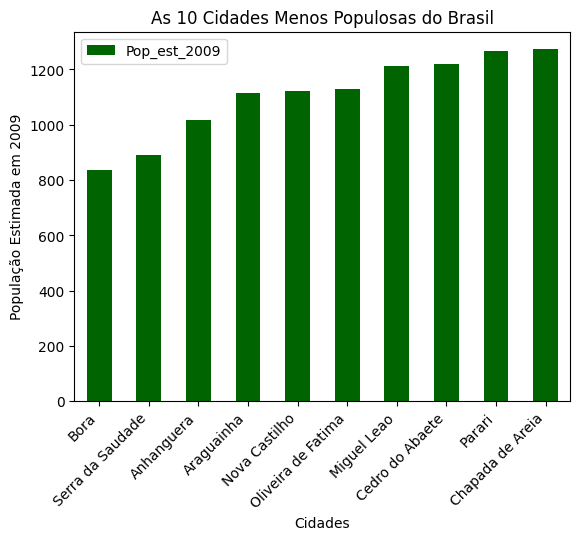

In [187]:
import matplotlib.pyplot as plt

menos_populosas_df = brasil_df.sort_values('Pop_est_2009', ascending=True).head(10)
menos_populosas_df

menos_populosas_df.plot(kind='bar', x='cidade', y='Pop_est_2009', color='darkgreen')
plt.title('As 10 Cidades Menos Populosas do Brasil')
plt.xlabel('Cidades')
plt.ylabel('População Estimada em 2009')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor leitura
plt.show()

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

Text(0.5, 1.0, 'Proporção da População do Brasil por Região')

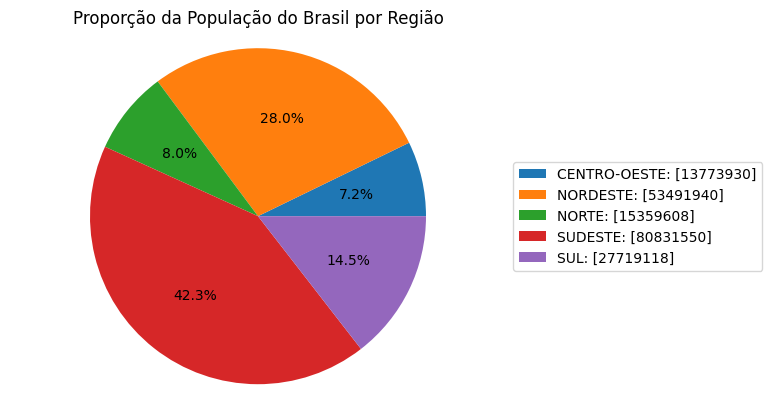

In [184]:

regiao_df = brasil_df[['regiao', 'Pop_est_2009']].groupby('regiao').agg('sum')

regiao_df
plt.pie(regiao_df['Pop_est_2009'], autopct='%1.1f%%')
plt.axis('equal')

legenda = ['{}: {}'.format(regiao, valor) for regiao, valor in zip(regiao_df.index, regiao_df.values)]
plt.legend(legenda, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Proporção da População do Brasil por Região')